# Getting Data

In [4]:
import pandas as pd

data = pd.read_csv('Data/train.csv')
data.drop('id', axis=1, inplace=True)

data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


# Feature Engineering


In [5]:
new_data = data.copy()

new_data = pd.get_dummies(new_data, dtype=int)
X,y = new_data.drop('diagnosed_diabetes', axis=1), new_data['diagnosed_diabetes']

new_data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,1,0,0,1,0,0,1,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,0,0,1,0,0,1,1,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,1,0,0,0,0,1,0,1,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,1,0,0,1,0,0,1,0,0,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,0,0,1,0,1,0,1,0,0,0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,0,0,1,0,1,0,1,0,0,0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,0,1,0,0,0,1,1,0,0,0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,1,0,0,0,0,1,0,1,0,0


# Data Metric and visualisation

## Correlation Matrix

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_mtx(data:pd.DataFrame, annot:bool = True, size:int = (20,20)):
    names = data.columns
    df_features = pd.DataFrame(data, columns=names)

    corr_mtx = df_features.corr(method='pearson')


    plt.figure(figsize=size)
    # 'annot=True' prints the values; 'fmt=".2f"' rounds to 2 decimal places
    sns.heatmap(corr_mtx, annot=annot, fmt=".2f", cmap="RdBu_r", xticklabels=names, yticklabels=names)
    plt.show()

    return corr_mtx

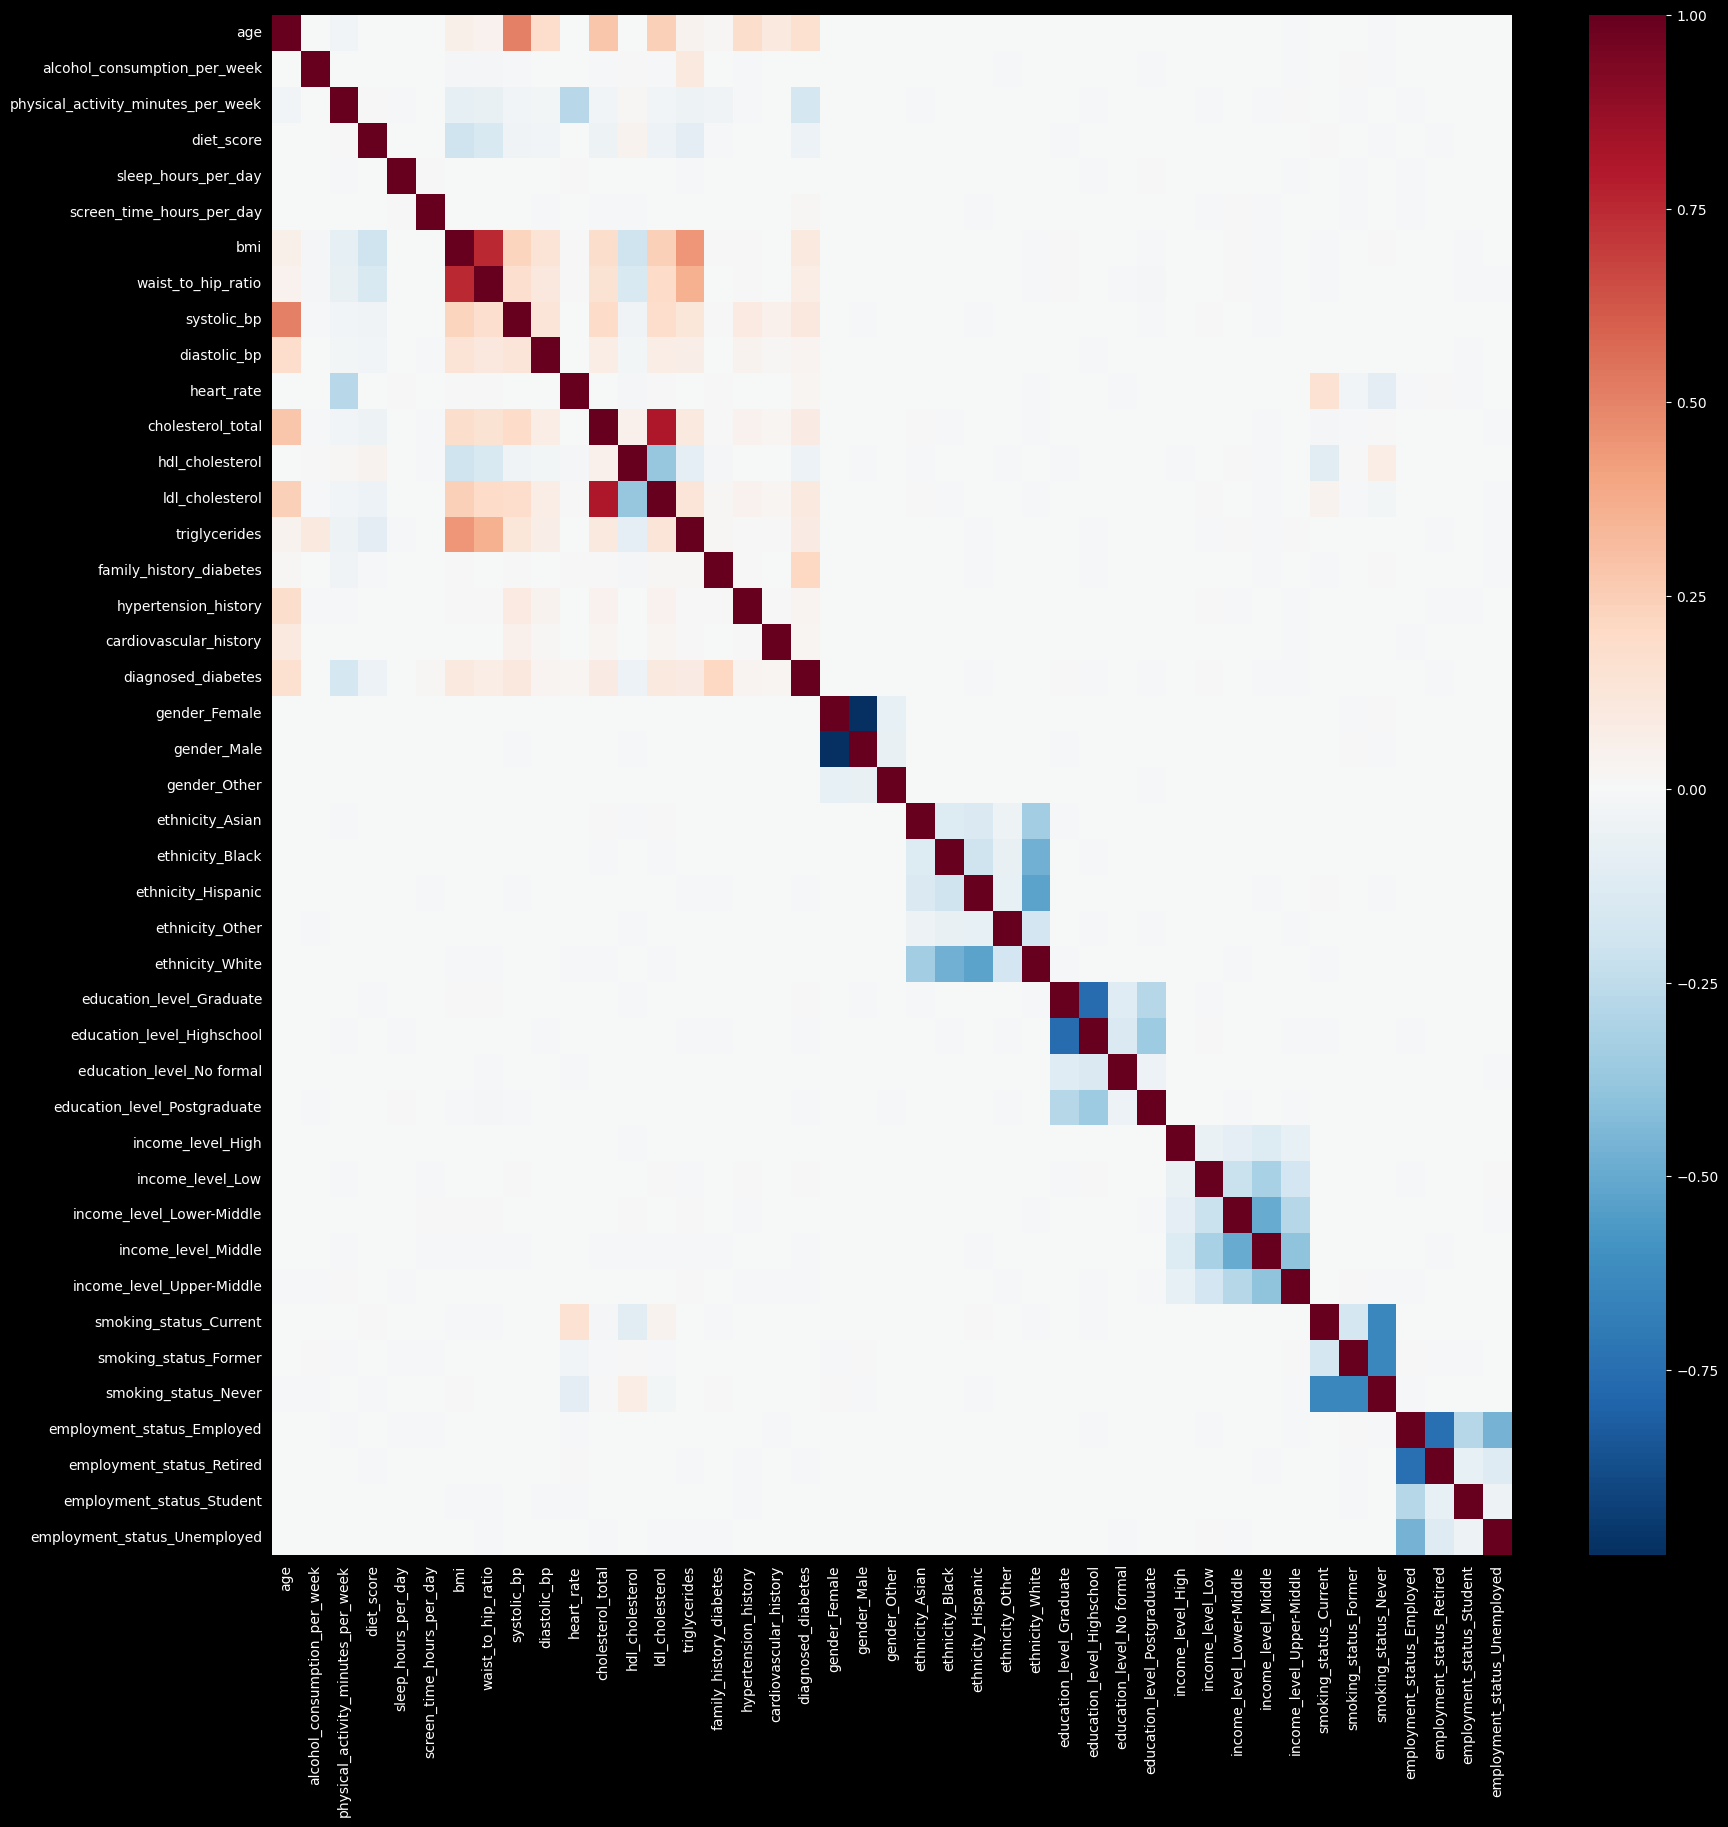

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
age,1.000000,0.003295,-0.029101,-0.001898,-0.001286,-0.002313,0.062958,0.044654,0.502894,0.188403,...,0.000413,0.000178,-0.004668,0.002778,0.001404,-0.003252,0.002964,-0.002097,0.000568,-0.002396
alcohol_consumption_per_week,0.003295,1.000000,0.003010,0.003284,-0.000351,0.004797,-0.017552,-0.014716,-0.006472,-0.001502,...,-0.000149,0.004919,-0.003096,0.002664,0.009856,-0.009716,-0.001423,-0.001646,0.002889,0.003022
physical_activity_minutes_per_week,-0.029101,0.003010,1.000000,0.008466,-0.006900,0.001754,-0.085086,-0.067508,-0.030908,-0.018341,...,0.002169,-0.003984,0.005711,-0.000046,-0.003593,0.002822,-0.002781,-0.000309,0.002961,0.003370
diet_score,-0.001898,0.003284,0.008466,1.000000,0.000882,0.000382,-0.198899,-0.150906,-0.038676,-0.028384,...,-0.001772,0.002569,-0.001979,0.009965,0.002791,-0.009926,0.002212,-0.003056,0.002467,-0.000902
sleep_hours_per_day,-0.001286,-0.000351,-0.006900,0.000882,1.000000,0.005965,0.003380,0.000371,0.003995,0.001457,...,-0.002325,0.003569,-0.004584,0.001731,-0.004486,0.002130,-0.003341,0.001440,-0.000536,0.003971
screen_time_hours_per_day,-0.002313,0.004797,0.001754,0.000382,0.005965,1.000000,0.002758,0.003393,0.004276,-0.004632,...,0.005760,-0.004534,0.003980,0.002812,-0.003354,0.000410,-0.005081,0.004845,0.001769,0.000599
bmi,0.062958,-0.017552,-0.085086,-0.198899,0.003380,0.002758,1.000000,0.757191,0.225033,0.143702,...,0.006610,-0.005057,-0.001422,-0.009977,0.003067,0.005394,0.000850,0.001328,-0.002841,-0.001610
waist_to_hip_ratio,0.044654,-0.014716,-0.067508,-0.150906,0.000371,0.003393,0.757191,1.000000,0.171691,0.111056,...,0.009051,-0.006503,-0.000744,-0.006851,0.001585,0.004108,0.002048,0.001401,-0.002719,-0.003844
systolic_bp,0.502894,-0.006472,-0.030908,-0.038676,0.003995,0.004276,0.225033,0.171691,1.000000,0.132916,...,0.001361,-0.003920,-0.002196,-0.001350,-0.002230,0.002780,0.000680,-0.000490,-0.001334,0.000372
diastolic_bp,0.188403,-0.001502,-0.018341,-0.028384,0.001457,-0.004632,0.143702,0.111056,0.132916,1.000000,...,0.002244,-0.000461,0.000480,0.000144,-0.002009,0.001446,0.000665,-0.000892,-0.002800,0.001890


In [7]:
corr_mtx(new_data, False)

# Mutal Information

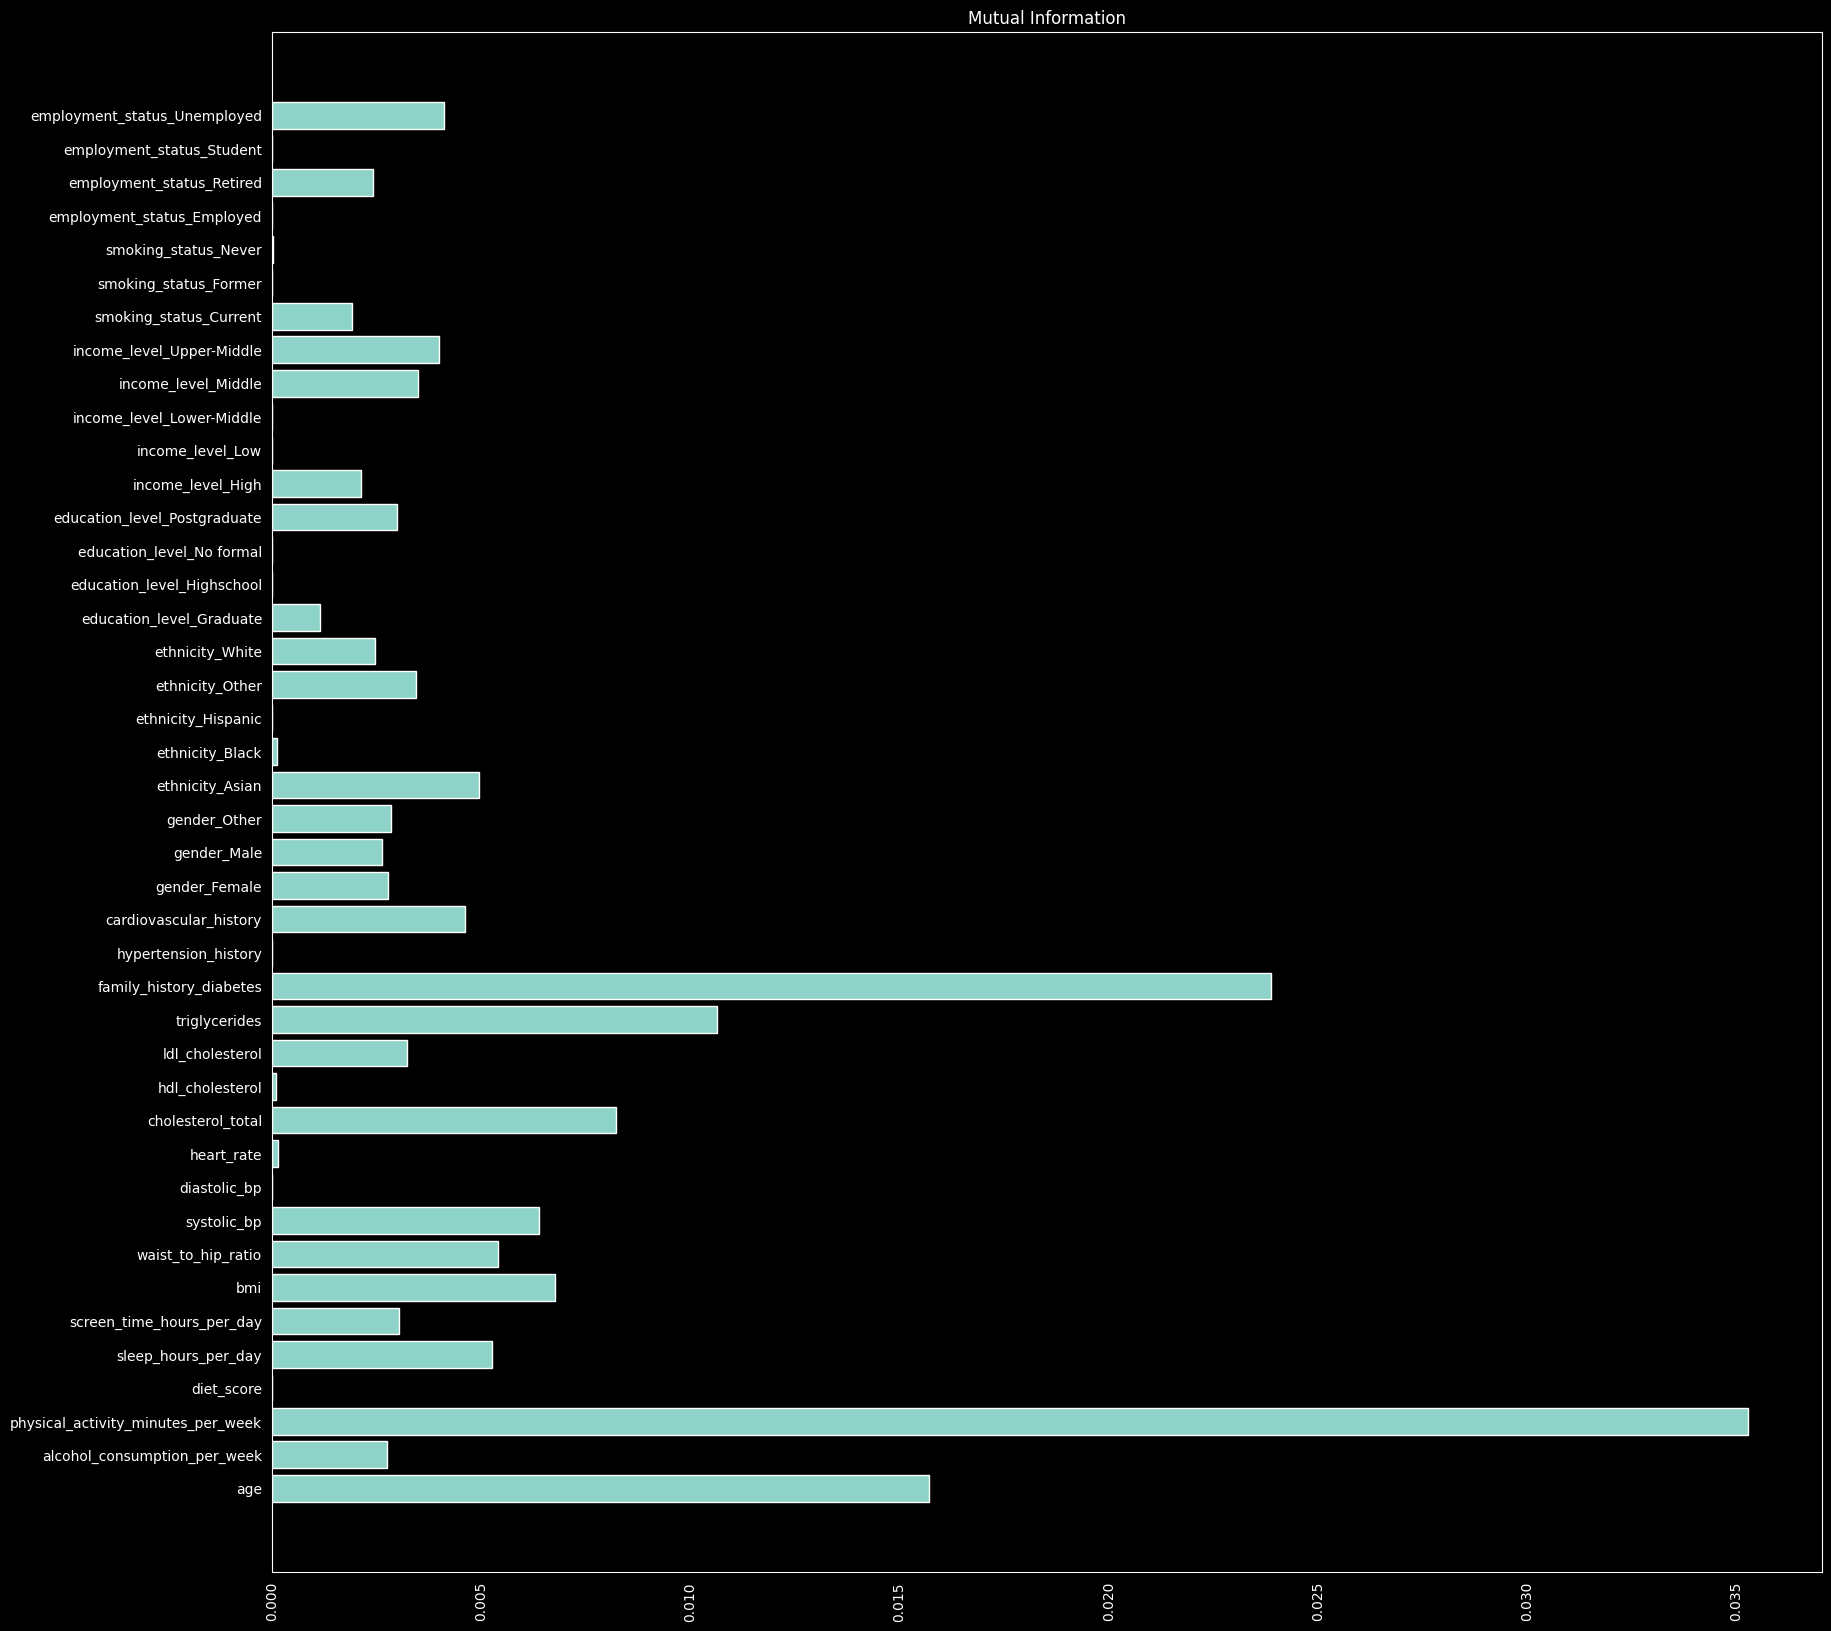

,Feature,Mutual Information
0,age,0.015713
1,alcohol_consumption_per_week,0.002764
2,physical_activity_minutes_per_week,0.035278
3,diet_score,0.000000
4,sleep_hours_per_day,0.005273
5,screen_time_hours_per_day,0.003035
6,bmi,0.006778
7,waist_to_hip_ratio,0.005395
8,systolic_bp,0.006386
9,diastolic_bp,0.000000


In [8]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression


sampel_idx = np.random.choice(len(data), size=int(7e4), replace=False)

mi = mutual_info_regression(X.iloc[sampel_idx], y.iloc[sampel_idx])
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi})

plt.figure(figsize=(20, 20))
plt.barh(X.columns, mi)
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Mutual Information')
plt.show()
mi_df

# Redundant data

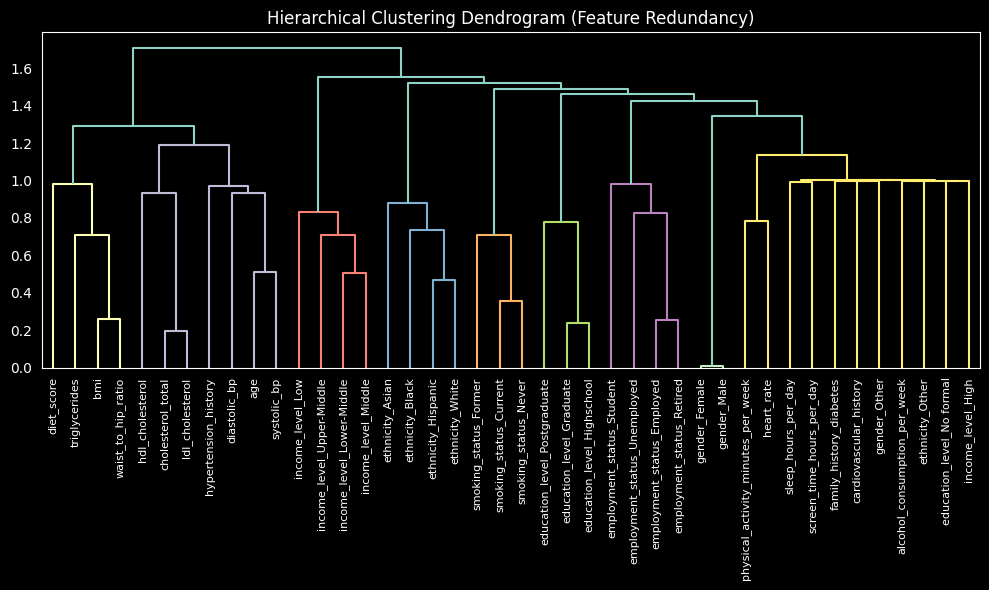

Original features: 42
Reduced features: 13
Selected: Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'cholesterol_total', 'family_history_diabetes',
       'gender_Female', 'ethnicity_Asian', 'education_level_Graduate',
       'income_level_Low', 'smoking_status_Current',
       'employment_status_Employed'],
      dtype='object')


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict

names = X.columns
# 1. Compute Spearman correlation and distance matrix
# Assuming X is your dataframe of explanatory variables
corr = spearmanr(X).correlation
# Ensure the matrix is symmetric (sometimes float errors occur)
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Convert correlation to a distance matrix
dist_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(hierarchy.distance.squareform(dist_matrix))

# 2. Visualize the Dendrogram
fig, ax = plt.subplots(figsize=(10, 6))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=names, ax=ax, leaf_rotation=90
)
ax.set_title("Hierarchical Clustering Dendrogram (Feature Redundancy)")
plt.tight_layout()
plt.grid(False)
plt.show()

# 3. Select Features
# Threshold '1' is common for 1 - abs(corr), but you can adjust based on the plot
cluster_ids = hierarchy.fcluster(dist_linkage, t=1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# Keep only the first feature from each cluster
selected_idx = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features = names[selected_idx]
X_reduced = X.iloc[:, selected_idx]


print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {len(selected_features)}")
print(f"Selected: {selected_features}")

# First Approach
We use all predictors and let feature selector decide which will not used

In [10]:
new_data.to_csv('Data/train_all_dummies.csv')

## Test
test = pd.read_csv('Data/test.csv')
dummies_test = pd.get_dummies(test)
dummies_test.to_csv('Data/test_dummies.csv')

# Second Approach
We remove redundant data based on correlation, common sense and mutual information

In [11]:
# TODO: remove redundant data
redundant = []


# Third approach
We take data from scipy clusters


In [12]:
selected_features_target = [*selected_features, 'diagnosed_diabetes']
print(selected_features_target)

cluster_data = new_data[selected_features_target]
cluster_data.to_csv('Data/train_cluster.csv')

cluster_test = dummies_test[selected_features]
cluster_test.to_csv('Data/test_cluster.csv')

['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'cholesterol_total', 'family_history_diabetes', 'gender_Female', 'ethnicity_Asian', 'education_level_Graduate', 'income_level_Low', 'smoking_status_Current', 'employment_status_Employed', 'diagnosed_diabetes']


## Clustered data exploration

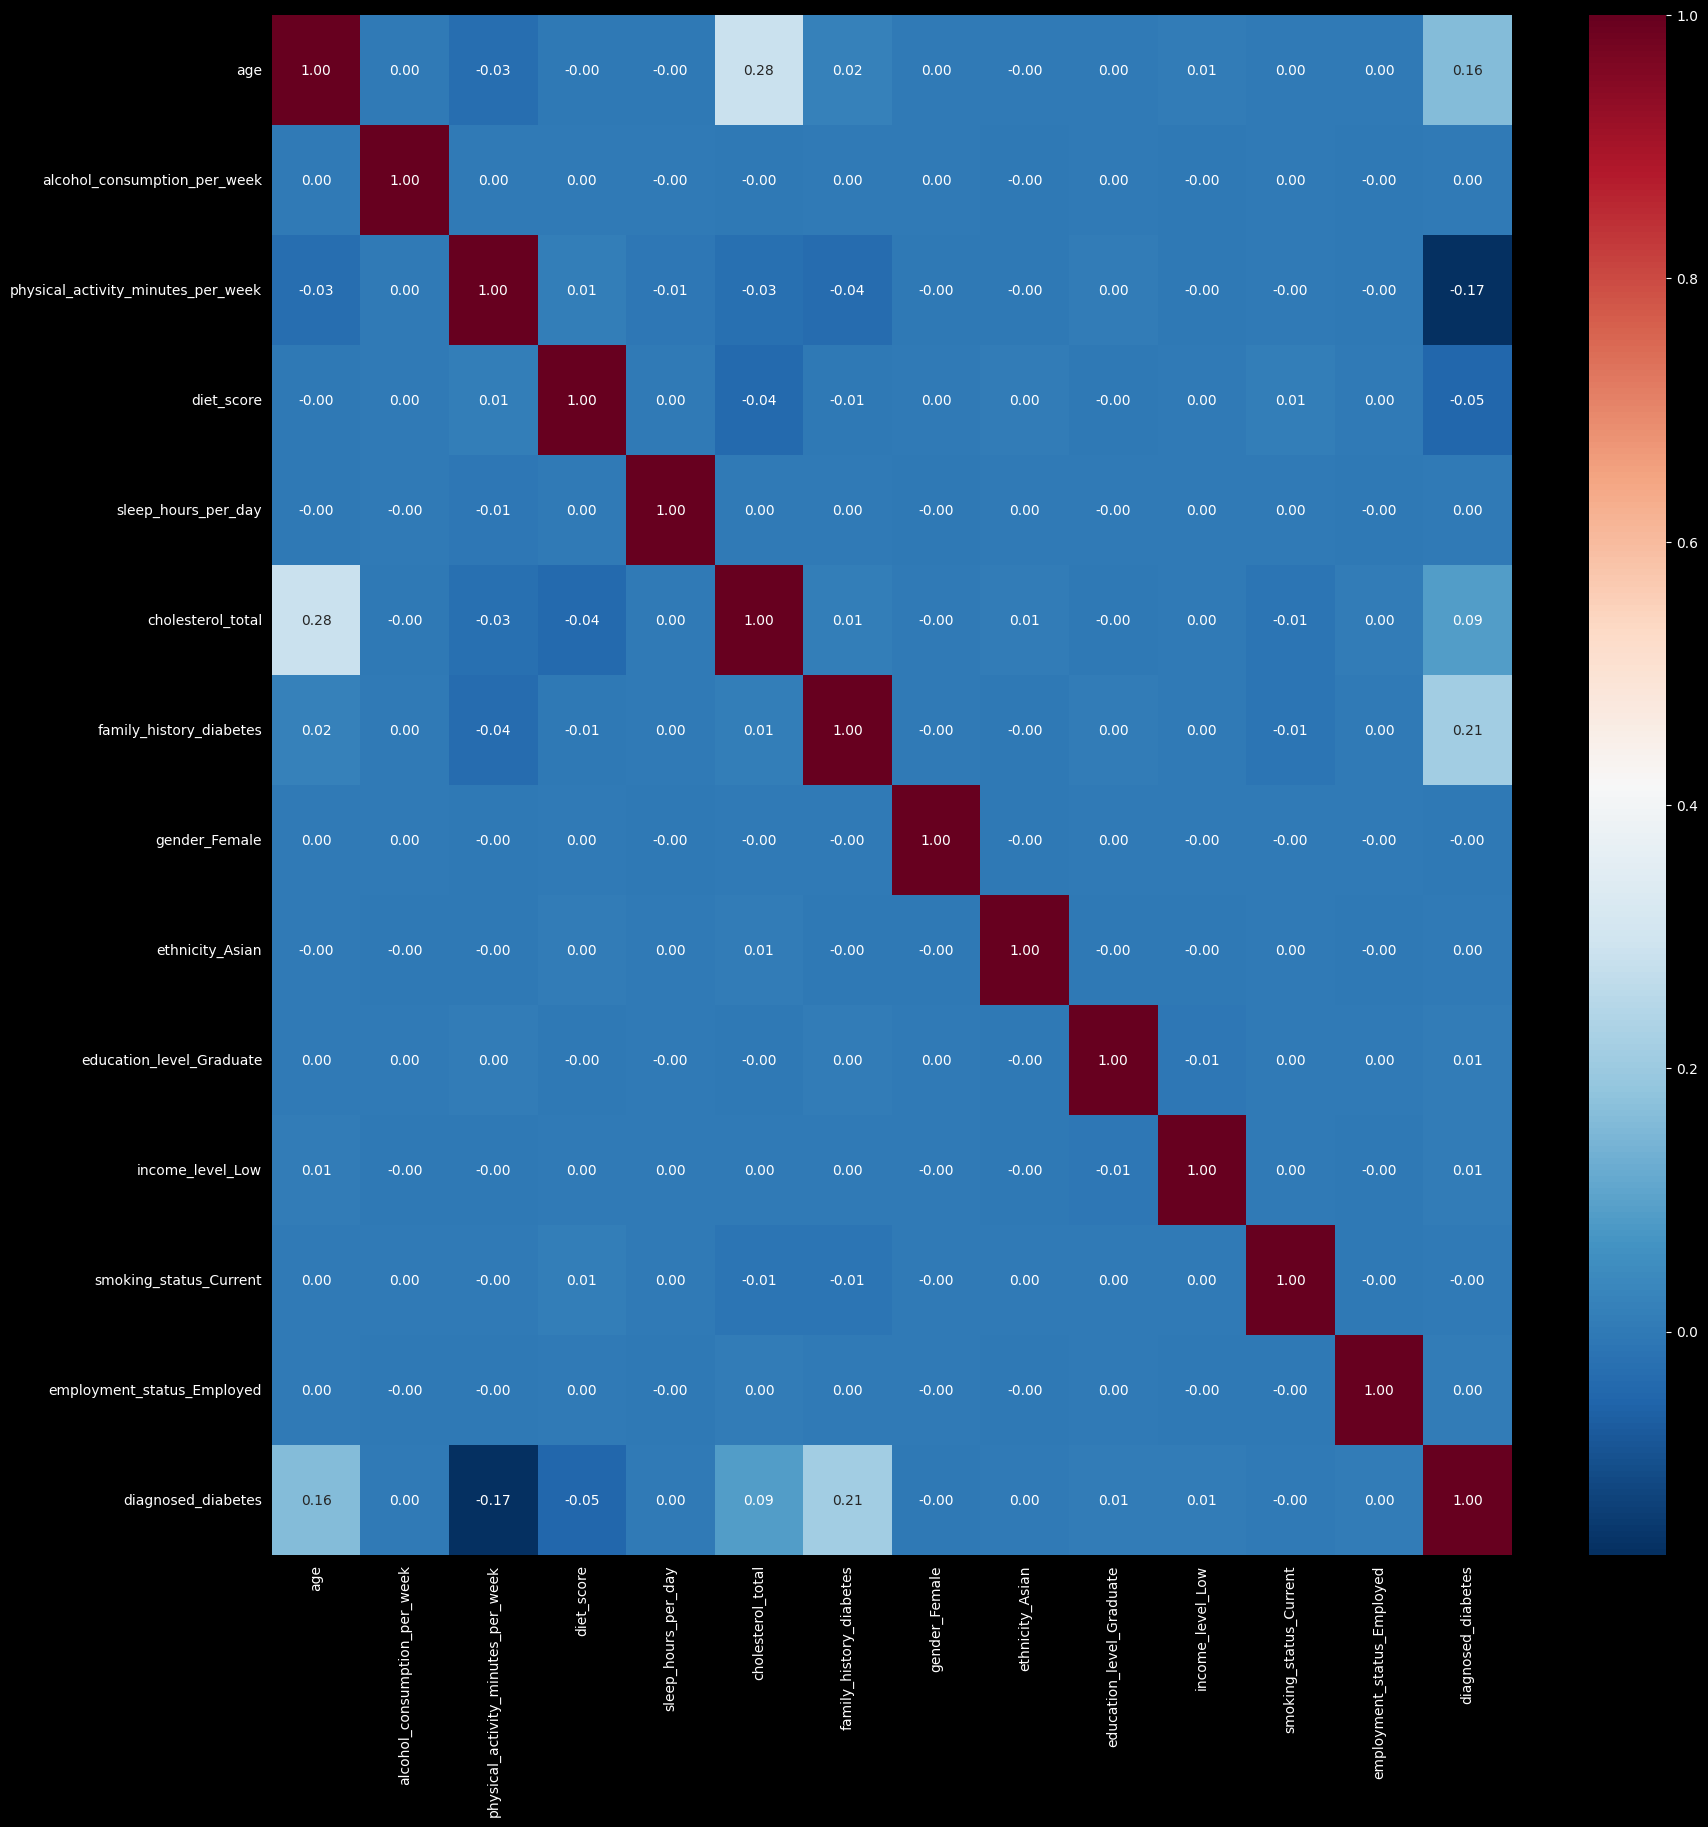

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,cholesterol_total,family_history_diabetes,gender_Female,ethnicity_Asian,education_level_Graduate,income_level_Low,smoking_status_Current,employment_status_Employed,diagnosed_diabetes
age,1.000000,0.003295,-0.029101,-0.001898,-0.001286,0.283155,0.018417,0.001622,-0.000140,0.000377,0.005215,0.002778,0.002964,0.161162
alcohol_consumption_per_week,0.003295,1.000000,0.003010,0.003284,-0.000351,-0.003121,0.002069,0.001376,-0.001023,0.002441,-0.002349,0.002664,-0.001423,0.002991
physical_activity_minutes_per_week,-0.029101,0.003010,1.000000,0.008466,-0.006900,-0.027439,-0.035260,-0.000997,-0.003295,0.004388,-0.003623,-0.000046,-0.002781,-0.169789
diet_score,-0.001898,0.003284,0.008466,1.000000,0.000882,-0.041622,-0.005173,0.000741,0.003924,-0.002925,0.001157,0.009965,0.002212,-0.050119
sleep_hours_per_day,-0.001286,-0.000351,-0.006900,0.000882,1.000000,0.001287,0.002502,-0.001147,0.002540,-0.000062,0.002990,0.001731,-0.003341,0.003509
cholesterol_total,0.283155,-0.003121,-0.027439,-0.041622,0.001287,1.000000,0.010208,-0.000089,0.005426,-0.001683,0.003647,-0.011633,0.004590,0.088112
family_history_diabetes,0.018417,0.002069,-0.035260,-0.005173,0.002502,0.010208,1.000000,-0.000121,-0.001859,0.004857,0.000231,-0.009902,0.000942,0.211064
gender_Female,0.001622,0.001376,-0.000997,0.000741,-0.001147,-0.000089,-0.000121,1.000000,-0.001091,0.002834,-0.000558,-0.000170,-0.000336,-0.002337
ethnicity_Asian,-0.000140,-0.001023,-0.003295,0.003924,0.002540,0.005426,-0.001859,-0.001091,1.000000,-0.003112,-0.001403,0.000339,-0.001259,0.003288
education_level_Graduate,0.000377,0.002441,0.004388,-0.002925,-0.000062,-0.001683,0.004857,0.002834,-0.003112,1.000000,-0.007665,0.001672,0.000830,0.005911


In [13]:
corr_mtx(cluster_data, annot = True)

# Mutal information

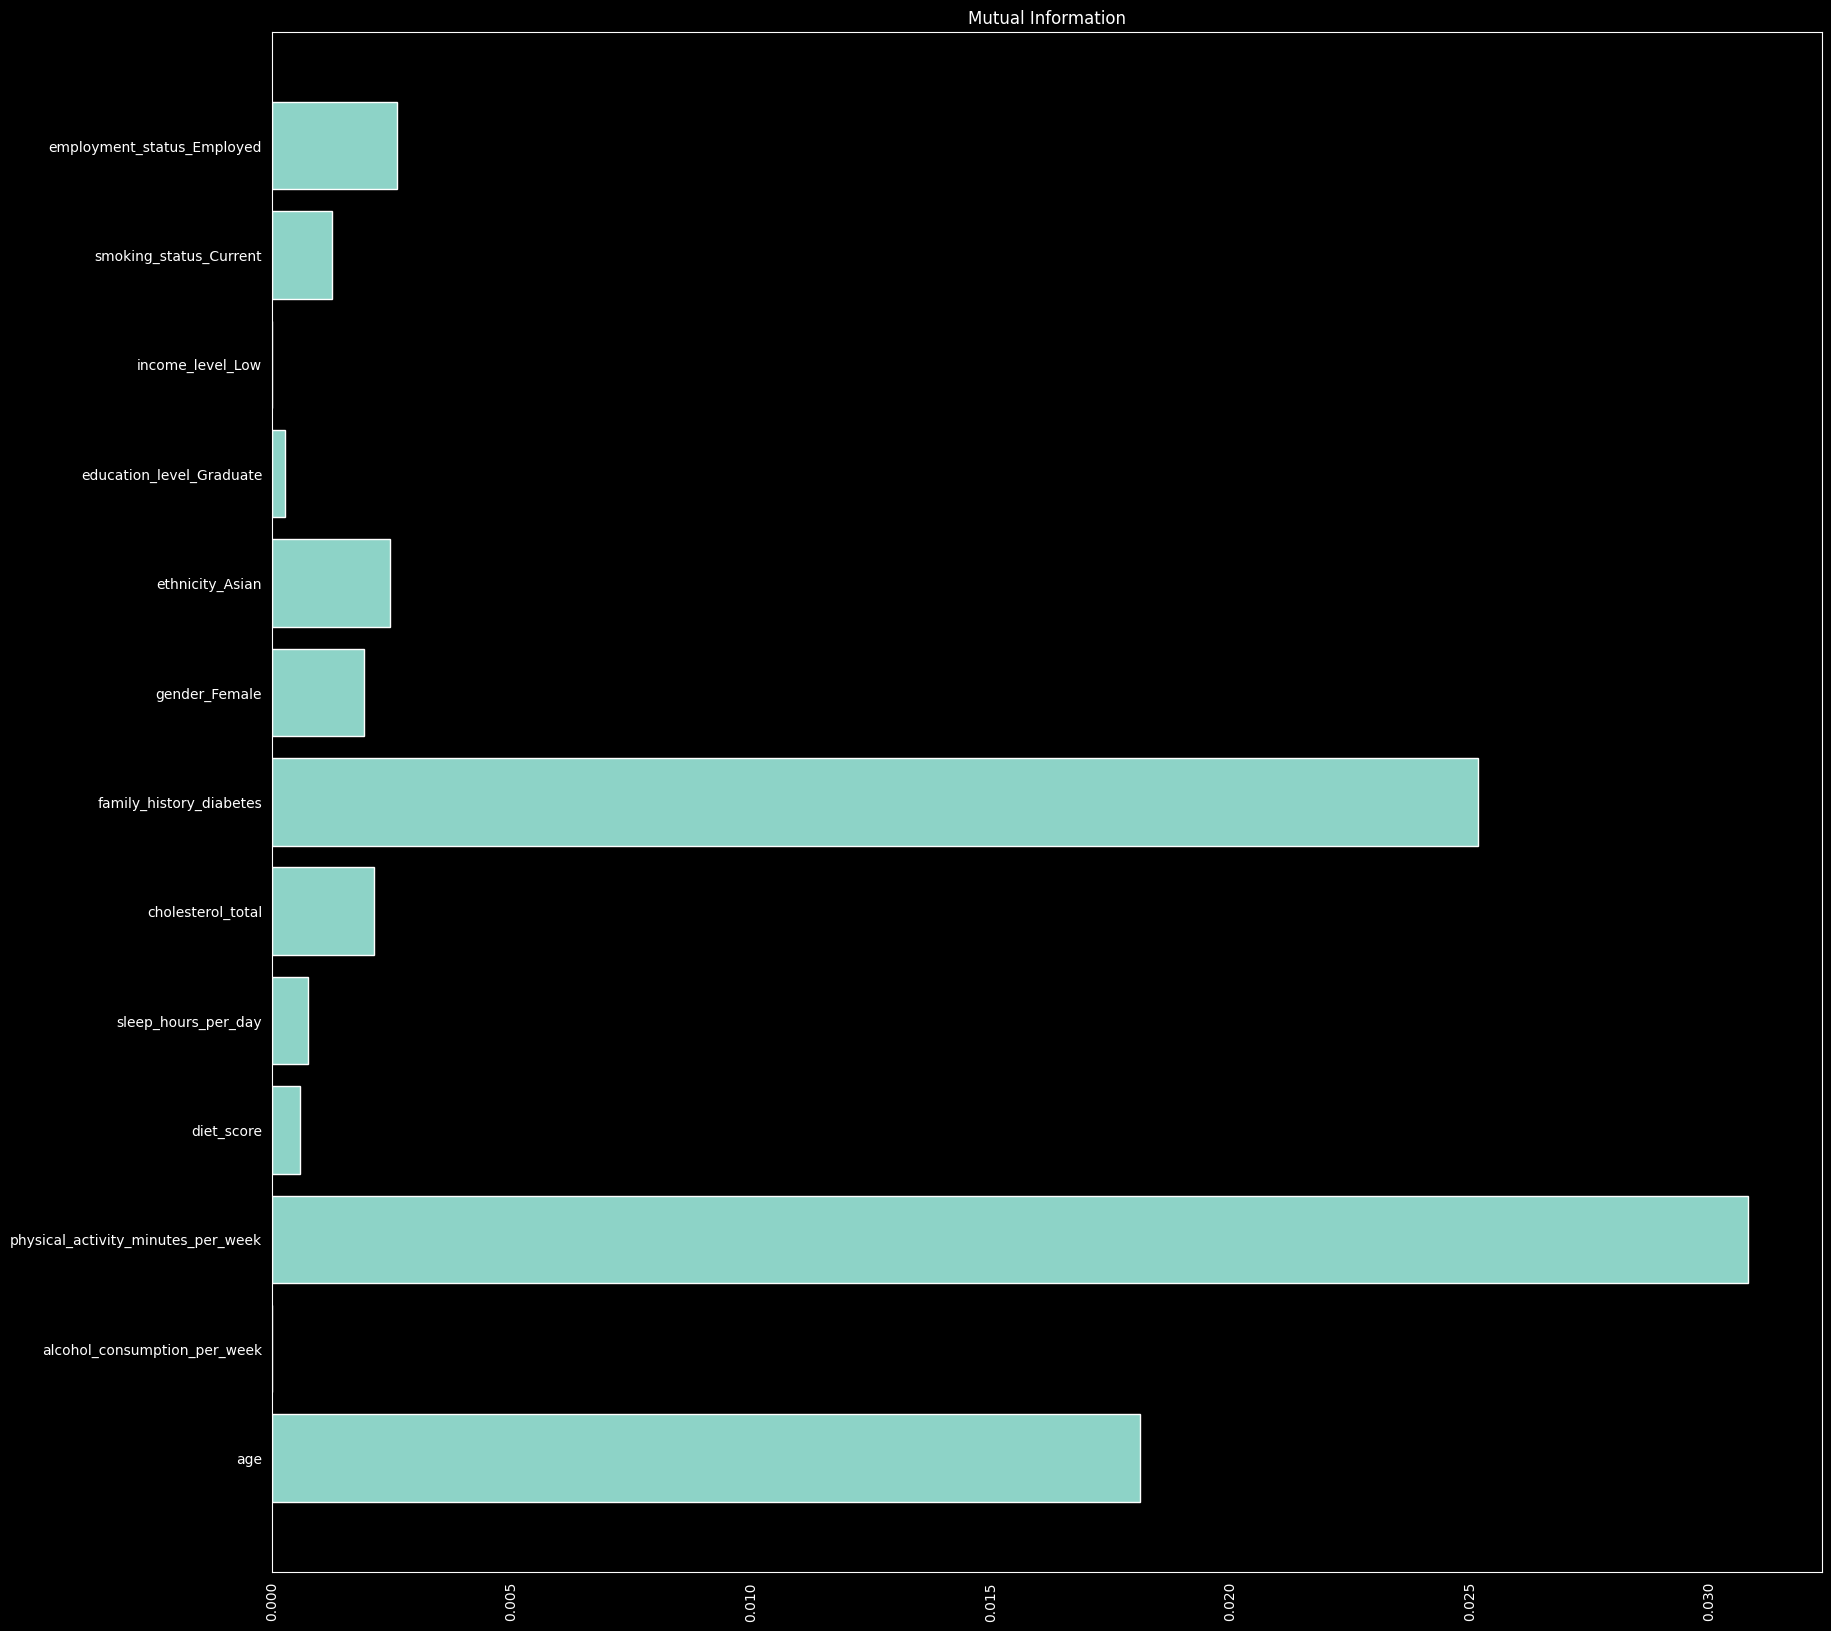

,Feature,Mutual Information
0,age,0.018119
1,alcohol_consumption_per_week,0.000000
2,physical_activity_minutes_per_week,0.030802
3,diet_score,0.000578
4,sleep_hours_per_day,0.000764
5,cholesterol_total,0.002140
6,family_history_diabetes,0.025163
7,gender_Female,0.001921
8,ethnicity_Asian,0.002472
9,education_level_Graduate,0.000276


In [14]:
sampel_idx = np.random.choice(len(data), size=int(7e4), replace=False)

cX,cy = cluster_data.drop('diagnosed_diabetes', axis=1), cluster_data['diagnosed_diabetes']

mi = mutual_info_regression(cX.iloc[sampel_idx], cy.iloc[sampel_idx])
mi_df = pd.DataFrame({"Feature": cX.columns, "Mutual Information": mi})

plt.figure(figsize=(20, 20))
plt.barh(cX.columns, mi)
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Mutual Information')
plt.show()
mi_df

# Choosen by hand features

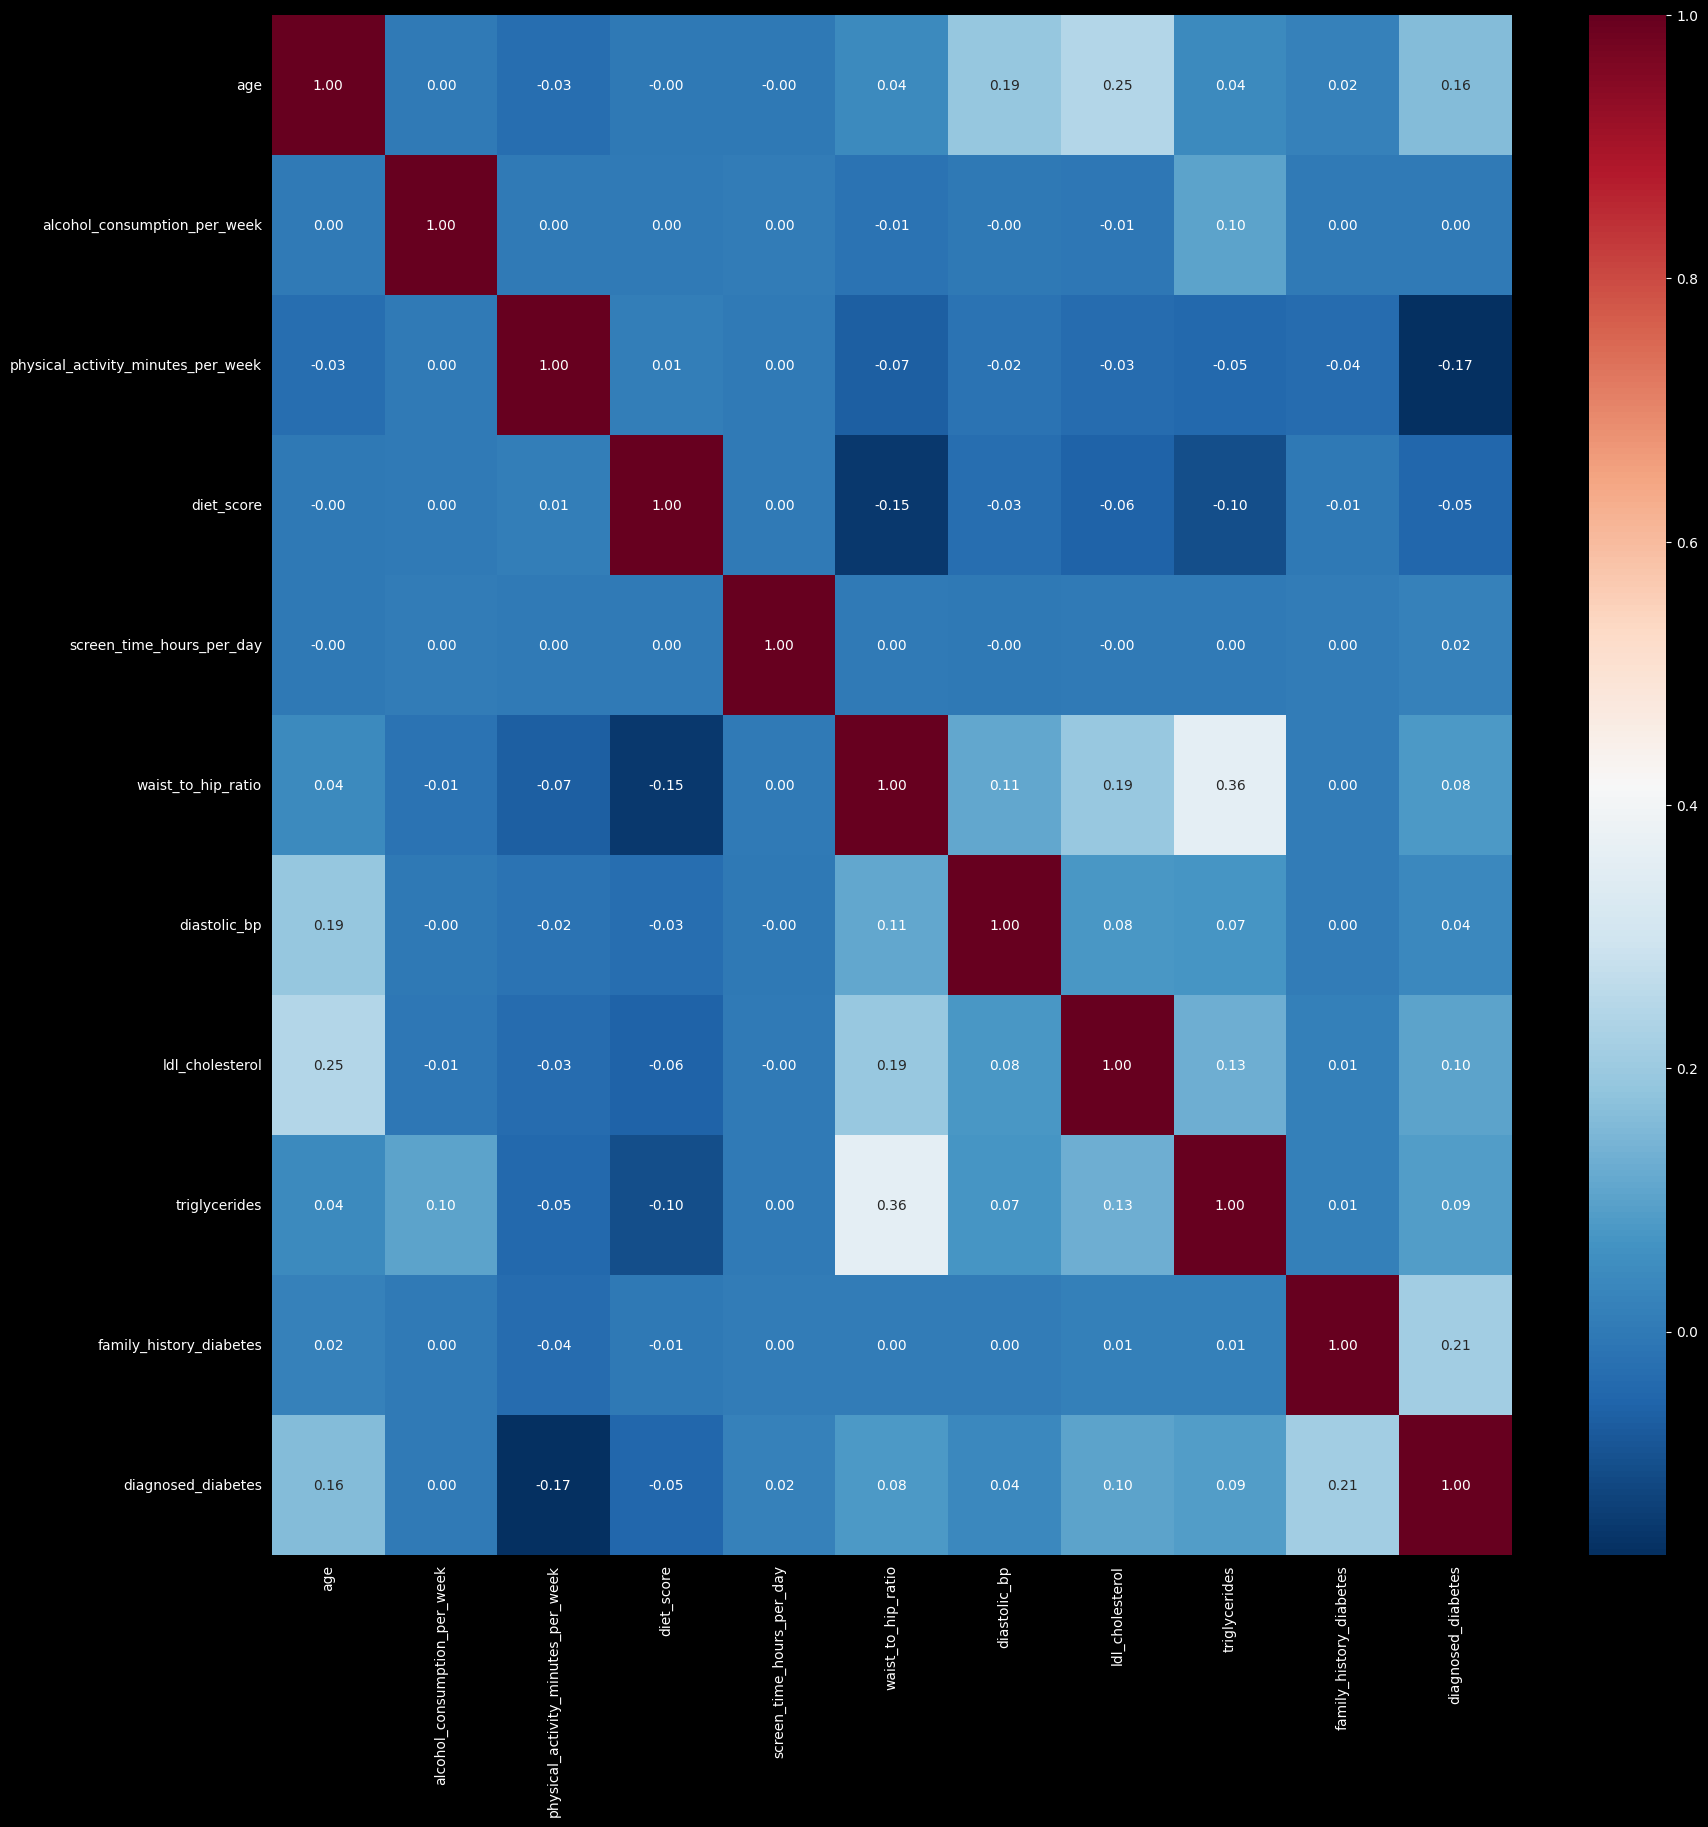

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,waist_to_hip_ratio,diastolic_bp,ldl_cholesterol,triglycerides,family_history_diabetes,diagnosed_diabetes
age,1.000000,0.003295,-0.029101,-0.001898,-0.002313,0.044654,0.188403,0.245503,0.043605,0.018417,0.161162
alcohol_consumption_per_week,0.003295,1.000000,0.003010,0.003284,0.004797,-0.014716,-0.001502,-0.006305,0.099985,0.002069,0.002991
physical_activity_minutes_per_week,-0.029101,0.003010,1.000000,0.008466,0.001754,-0.067508,-0.018341,-0.033272,-0.045595,-0.035260,-0.169789
diet_score,-0.001898,0.003284,0.008466,1.000000,0.000382,-0.150906,-0.028384,-0.055908,-0.101834,-0.005173,-0.050119
screen_time_hours_per_day,-0.002313,0.004797,0.001754,0.000382,1.000000,0.003393,-0.004632,-0.000059,0.003124,0.004202,0.018213
waist_to_hip_ratio,0.044654,-0.014716,-0.067508,-0.150906,0.003393,1.000000,0.111056,0.193638,0.359802,0.004509,0.081050
diastolic_bp,0.188403,-0.001502,-0.018341,-0.028384,-0.004632,0.111056,1.000000,0.075297,0.069475,0.003912,0.036271
ldl_cholesterol,0.245503,-0.006305,-0.033272,-0.055908,-0.000059,0.193638,0.075297,1.000000,0.131343,0.014129,0.102771
triglycerides,0.043605,0.099985,-0.045595,-0.101834,0.003124,0.359802,0.069475,0.131343,1.000000,0.014825,0.090635
family_history_diabetes,0.018417,0.002069,-0.035260,-0.005173,0.004202,0.004509,0.003912,0.014129,0.014825,1.000000,0.211064


In [15]:
chosen = [
    "age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "screen_time_hours_per_day",
    "waist_to_hip_ratio",
    "diastolic_bp",
    "ldl_cholesterol",
    "triglycerides",
    "family_history_diabetes",
    'diagnosed_diabetes'
]

corr_mtx(data[chosen], annot = True)

# mi

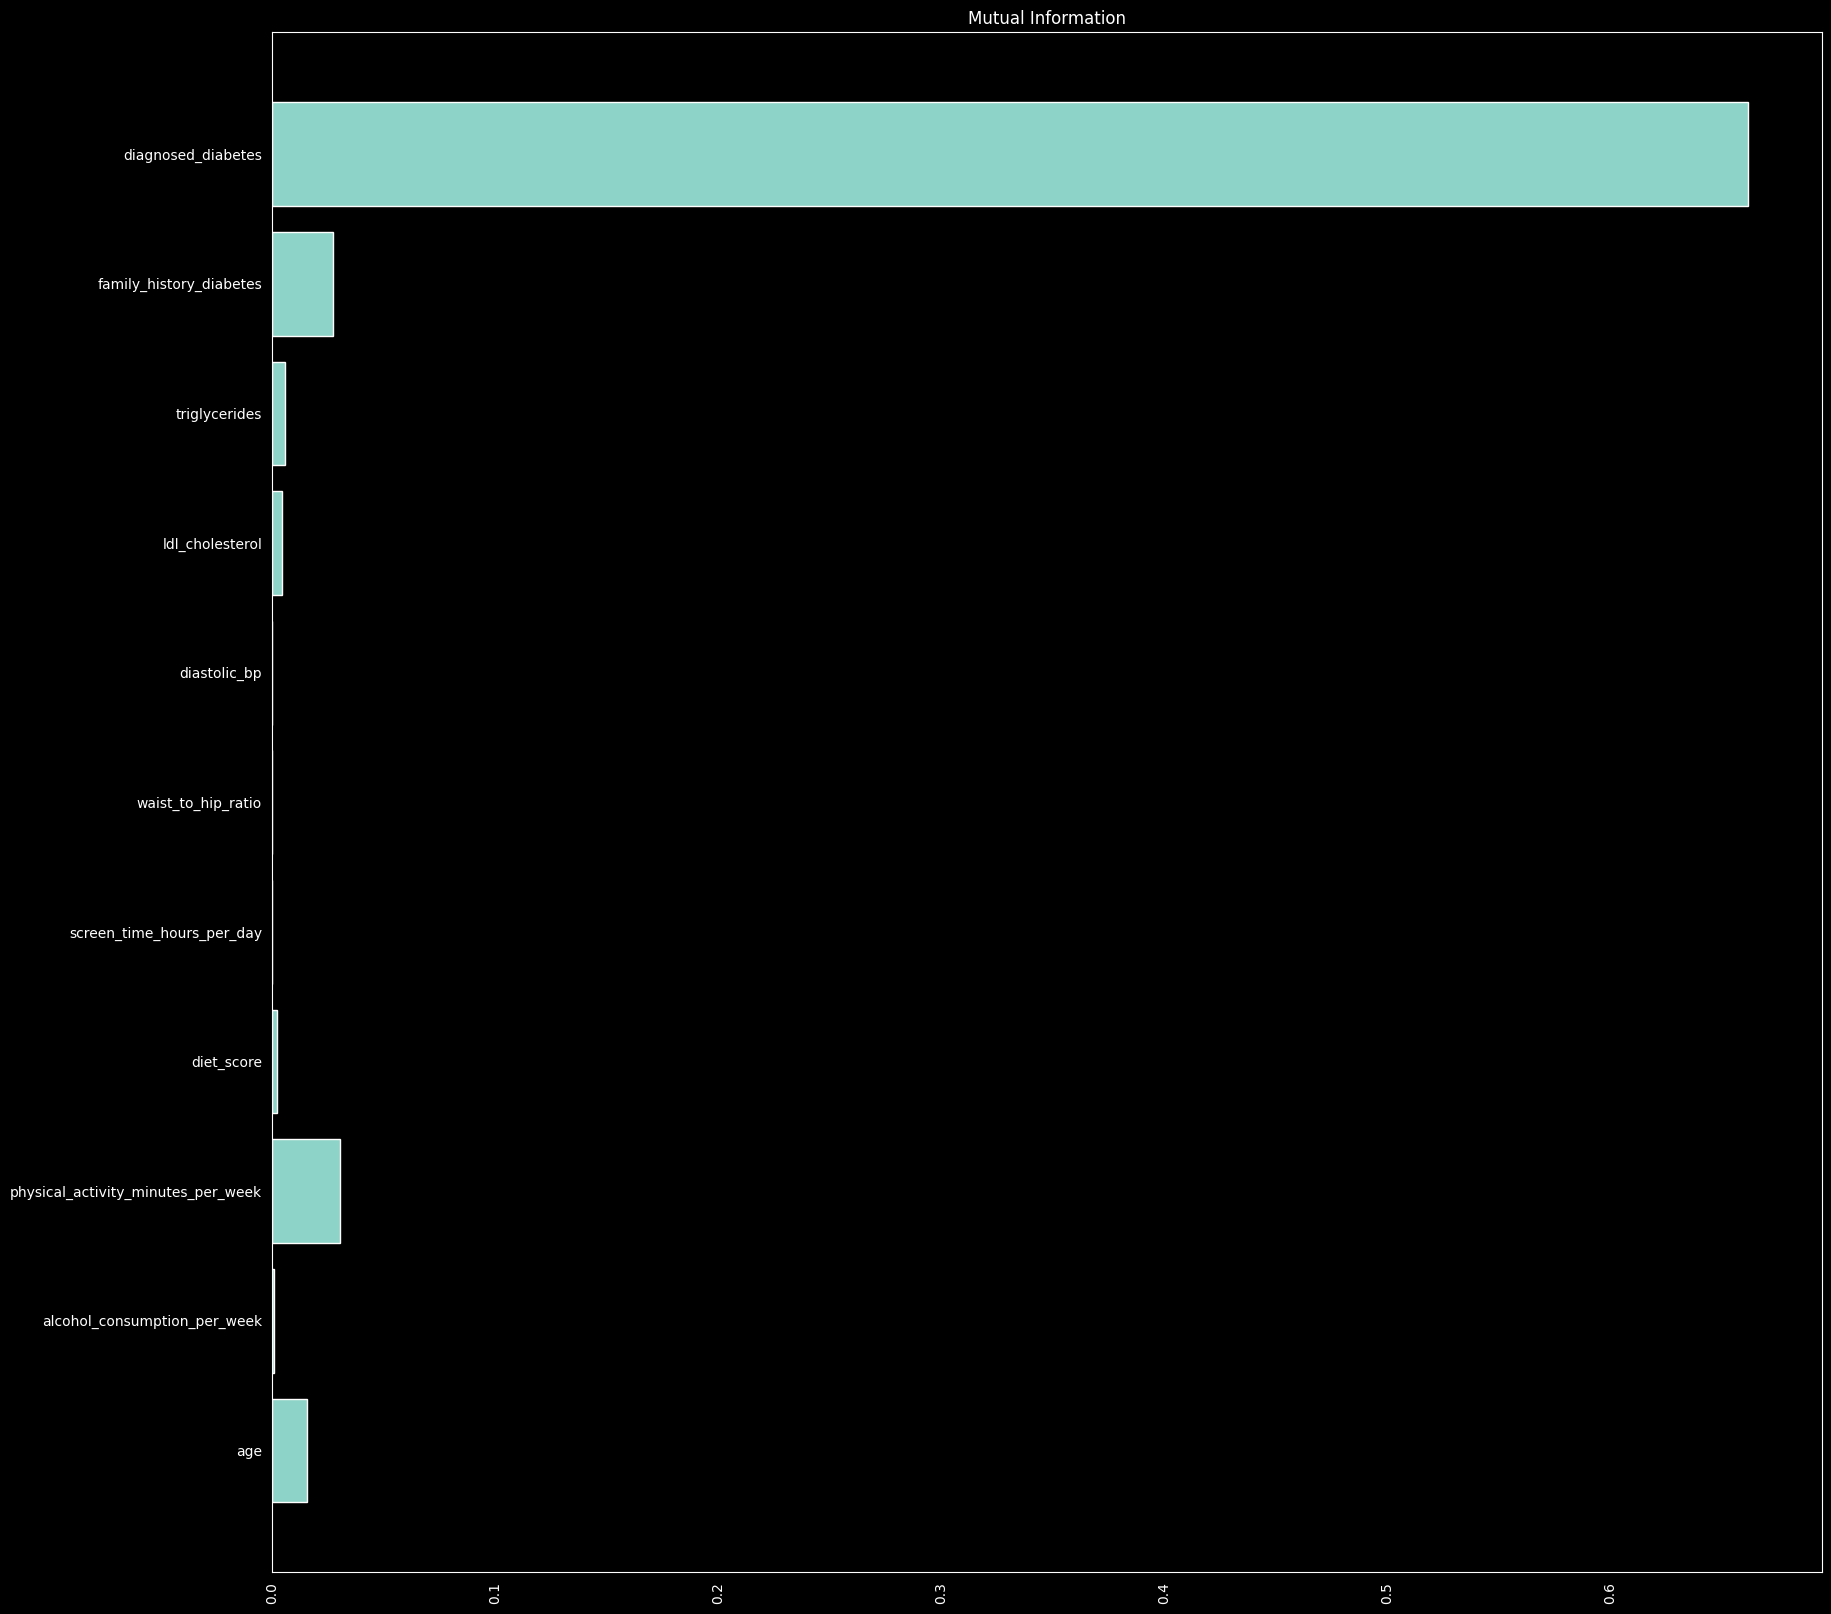

,Feature,Mutual Information
0,age,0.015701
1,alcohol_consumption_per_week,0.000852
2,physical_activity_minutes_per_week,0.030556
3,diet_score,0.002179
4,screen_time_hours_per_day,0.000000
5,waist_to_hip_ratio,0.000259
6,diastolic_bp,0.000000
7,ldl_cholesterol,0.004352
8,triglycerides,0.006097
9,family_history_diabetes,0.027263


In [16]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression


chosen_data = data[chosen]
sampel_idx = np.random.choice(len(chosen_data), size=int(7e4), replace=False)

mi = mutual_info_regression(chosen_data.iloc[sampel_idx], y.iloc[sampel_idx])
mi_df = pd.DataFrame({"Feature": chosen, "Mutual Information": mi})

plt.figure(figsize=(20, 20))
plt.barh(chosen, mi)
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Mutual Information')
plt.show()
mi_df

In [19]:
chosen_data.to_csv('Data/chosen_data.csv')
chosen_test = dummies_test[chosen[:-1]]

chosen_test.to_csv('Data/chosen_test.csv')